# An Analysis of Recent Cybersecurity Data Science Conference Presentations

In [ ]:
## Author: John Speed Meyers
## Date: February 25, 2020
## Institution: Cyber Reboot, IQT Labs

## Description: After gathering a dataset of 224 conference presentations
## from cybersecurity conferences that directly deal with "data science" 
## (liberally defined), I performed simple descriptive analyses of this dataset.
## The intent of this exercise was to examine broad trends in this admittedly 
## amorphous field of cybersecurity data science. Specifically, I was
## interested in what the main topics of these presentations were, what 
## research methods were used, and the home institutions of the presenters.
## Put another way, this analysis was an example of cataloging and reflection.

## Note on dataset: Each row is a conference presentation (or poster) at one
## of four conference within the past five years. The four conferences are
## the AI Village at DEFCON, Association for the Advancement of Artificial
## Intelligence/Artificial Intelligence for Cybersecurity (AAAI/AICS) workshop,
## the Conference on Applied Machine Learning for Information Security (CAMLIS),
## and FloCon. Not all years are present for every conference.

## Thanks to: Kinga Dobolyi of Lab 41/IQT Labs for help with conceptualizing
## this analysis.

## Import modules and dataset

In [1]:
## Modules needed for analysis
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
## Import presentation dataset
df = pd.read_csv(
    "data/cyber-datascience-presentations-raw.csv",
    header=0) ## Use first row for column names


## Create lists of unique domains and methods

In [3]:
domain_list = [] ## Empty list to store domains
method_list = [] ## Empty list to store methods

## Create a list of all domains in dataset

## Loop through the domain column
for items in df.domains:
    
    item_list = items.split(',') ## Split on comma

    ## Strip whitespace from list elements
    item_list_nospace = [item.strip() for item in item_list]

    ## Loop through cleaned elements and add to domain_list
    ## if not already in domain list
    for item in item_list_nospace:
        if item not in domain_list:
            domain_list.append(item)

## Loop through the domain column
for items in df.methods:

    item_list = items.split(',') ## Split on comma

    ## Strip whitespace from list elements
    item_list_nospace = [item.strip() for item in item_list]

    ## Loop through cleaned elements and add to domain_list
    ## if not already in domain list
    for item in item_list_nospace:
        if item not in method_list:
            method_list.append(item)

#print(domain_list)
#print(method_list)


## Unpack list-based features and export dataset

In [4]:
## Create a column for every domain and method and use zero's and one's to mark
## whether a topic or method was included for a given presentations

## Create a copy of the narrow dataframe
df_expanded = df.copy()

## Generate the wider dataframe where every unique domain is given
## its own column
for domain in domain_list:
    df_expanded[domain] = 0

for method in method_list:
    df_expanded[method] = 0

## for each new column, loop through rows and mark as true if a given domain
## is included as part of a given presentations, false otherwise
for domain in domain_list:

    ## True, false insertion
    df_expanded[domain] = df_expanded.apply(lambda x: domain in x.domains, axis=1)
    df_expanded[domain] = df_expanded[domain].astype(int) ## Convert to integer

## for each new column, loop through rows and mark as true if a given method
## is included as part of a given presentations, false otherwise
for method in method_list:

    ## True, false insertion
    df_expanded[method] = df_expanded.apply(lambda x: method in x.methods, axis=1)
    df_expanded[method] = df_expanded[method].astype(int) ## Convert to integer

## Export dataframe to csv
#df_expanded.to_csv(path_or_buf="data/cyber-datascience-presentations-cleaned.csv")


## Create dictionaries counting domains/topics, methods, and presenter institutions

In [5]:
## Create dictionary with topics as key and count as value
domains = {} ## Empty dict
for row in df.domains:
    for topic in row.split(","): ## 
        topic_clean = topic.strip() ## Strip whitespace

        if topic_clean not in domains.keys():
            domains[topic_clean] = 1
        else:
            domains[topic_clean] += 1

## Create dictionary with methods as key and count as value
methods = {}
for row in df.methods:
    for method in row.split(","):
        method_clean = method.strip()

        if method_clean not in methods.keys():
            methods[method_clean] = 1
        else:
            methods[method_clean] += 1

## Create dictionary with presenter home institution and count as value
## Note because multiple presenters for a given presentation can be
## from the same institution, this analysis looks only at unique 
## institutions for a given presention
presenter_institutes = {}
for institutions in df.institutions:

    institution_list = institutions.split(",")

    ## Strip whitespace from all elements within list
    for i, elem in enumerate(institution_list):
        institution_list[i] = elem.strip()

    unique_institutions = set(institution_list) ## Reduce to unique set

    for institution in unique_institutions:
        if institution not in presenter_institutes.keys():
            presenter_institutes[institution] = 1
        else:
            presenter_institutes[institution] += 1

#{k: v for k, v in sorted(domains.items(), key=lambda item: item[1])}
#{k: v for k, v in sorted(methods.items(), key=lambda item: item[1])}
#{k: v for k, v in sorted(presenter_institutes.items(), key=lambda item: item[1])}


## Annotated heatmap of topics and methods co-occuring

In [6]:
## A helper function for this section

def annotated_heatmap(horizontal, vertical, data):
    """
    annotated_heatmap simplifies the construction of an
    annotated heatmap in which the count of co-occuring
    values from the variables on the x-axis (horizontal)
    and y-axis (vertical). See the usage below.
    
    CREDIT DUE TO MATPLOTLIB TEAM FOR HELPFUL
    DOCUMENTATION, CODE AND FUNCTIONALITY
    This code liberally borrows from the examples matplotlib provides
    https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

    Inputs:
    --horizontal: the variable whose values are to be placed on the horizontal axis
    --vertical: the variables whoses values are to be place on the vertical axis
    --data: dataset being mapped

    Output:
    --An annotated heatmap image
    """

    ## Begin plot creation
    fig, ax = plt.subplots()
    im = ax.imshow(data)

    ## Show and label ticks
    ax.set_xticks(np.arange(len(horizontal)))
    ax.set_yticks(np.arange(len(vertical)))
    ax.set_xticklabels(horizontal)
    ax.set_yticklabels(vertical)

    ## Place the x-axis labeling at top of the plot
    ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)

    ## Rotate the x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=40, ha="left",
             rotation_mode="anchor")

    # Turn spines off and create white grid
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Loop over data dimensions and create text annotations
    for i in range(len(vertical)):
        for j in range(len(horizontal)):
            text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")

    ## There is an odd bug in which half the top row and half the bottom
    ## row are cropped if this line of code is not present
    ax.set_ylim(len(data)-0.5, -0.5)

    ## Finish plotting
    fig.tight_layout()
    plt.show()

### Build topic-method co-occurence dataset

In [7]:
## These are the top-occuring topics and methods
topics = ['network traffic', 'malware', 'threat intelligence',
          'malicious domains', 'host logs', 'SOC operations', 'IDS']
methods = ['supervised machine learning', 'framework building',
           'dataset creation', 'software tool development',
           'unsupervised machine learning', 'natural language processing',
           'graph analysis']

## Build co-occurence of topics and methods list of lists
topic_method_list = [] ## Empty list to hold list of lists
for topic in topics:
    method_list = [] ## Reset inner list after loop through each topic
    for method in methods:
        ## Count number of presentations in which topic and method co-ccur
        num = df_expanded[(df_expanded[topic]  == 1) & \
                          (df_expanded[method] == 1)].count()[0]
        method_list.append(num)
    topic_method_list.append(method_list) ## Append inner list


### Plot topic-method co-occurence dataset

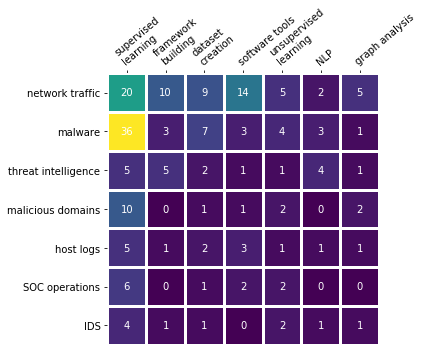

In [8]:
## Change plotting size to make figure appearance
## more pleasing
plt.rcParams['figure.figsize'] = (8,5)

## Define top topic areas and methods - notice subtle renaming to
## aid plotting below
topics = ['network traffic', 'malware', 'threat intelligence',
          'malicious domains', 'host logs', 'SOC operations', 'IDS']
methods = ['supervised\nlearning', 'framework\nbuilding',
           'dataset\ncreation', 'software tools',
           'unsupervised\nlearning', 'NLP',
           'graph analysis']

## Convert topic-method co-occurence list to a numpy array
data = np.array(topic_method_list)

## Plot annotated heatmap
annotated_heatmap(horizontal=methods, vertical=topics, data=data)

## Annotated heatmap of conferences and topics

### Create conference-topic co-occurence dataset

In [9]:
## These are the top-occuring topics and methods
conferences = ['AAAI/AICS', 'AI Village at DEFCON', 'CAMLIS', 'FloCon']
topics = ['network traffic', 'malware', 'threat intelligence',
          'malicious domains', 'host logs', 'SOC operations', 'IDS']

## Build co-occurence of conferences and topics list of lists
conference_topic_list = [] ## Empty list to hold list of lists
for conference in conferences:
    topic_list = [] ## Reset inner list after loop through each topic
    for topic in topics:
        ## Count number of presentations in which conference and topic co-ccur
        num = df_expanded[(df_expanded.forum  == conference) & \
                          (df_expanded[topic] == 1)].count()[0]
        topic_list.append(num)
    conference_topic_list.append(topic_list) ## Append inner list


### Plot conference-topic co-occurence dataset

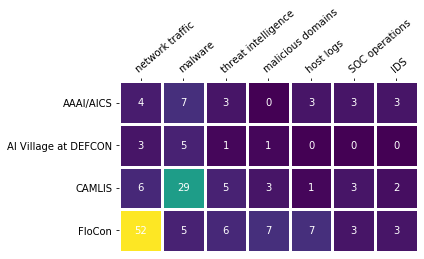

In [10]:
## Change plotting size to make figure appearance
## more pleasing
plt.rcParams['figure.figsize'] = (6,4)

## Define top topic areas and topics - notice subtle renaming to
## aid plotting below
conferences = ['AAAI/AICS', 'AI Village at DEFCON', 'CAMLIS', 'FloCon']
topics = ['network traffic', 'malware', 'threat intelligence',
          'malicious domains', 'host logs', 'SOC operations', 'IDS']

## Convert topic-method co-occurence list to a numpy array
data = np.array(conference_topic_list)

## Plot annotated heatmap
annotated_heatmap(horizontal=topics, vertical=conferences, data=data)

### Create conference-method co-occurence dataset

In [11]:
## These are the top-occuring topics and methods
conferences = ['AAAI/AICS', 'AI Village at DEFCON', 'CAMLIS', 'FloCon']
methods = ['supervised machine learning', 'framework building',
           'dataset creation', 'software tool development',
           'unsupervised machine learning', 'natural language processing',
           'graph analysis']

## Build co-occurence of conferences and topics list of lists
conference_method_list = [] ## Empty list to hold list of lists
for conference in conferences:
    method_list = [] ## Reset inner list after loop through each topic
    for method in methods:
        ## Count number of presentations in which conference and topic co-ccur
        num = df_expanded[(df_expanded.forum  == conference) & \
                          (df_expanded[method] == 1)].count()[0]
        method_list.append(num)
    conference_method_list.append(method_list) ## Append inner list


### Plot conference-method co-occurence dataset

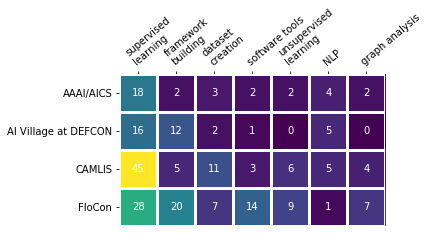

In [12]:
## Change plotting size to make figure appearance
## more pleasing
plt.rcParams['figure.figsize'] = (6,4)

## Define top topic areas and methods - notice subtle renaming to
## aid plotting below
conferences = ['AAAI/AICS', 'AI Village at DEFCON', 'CAMLIS', 'FloCon']
methods = ['supervised\nlearning', 'framework\nbuilding',
           'dataset\ncreation', 'software tools',
           'unsupervised\nlearning', 'NLP',
           'graph analysis']

## Convert topic-method co-occurence list to a numpy array
data = np.array(conference_method_list)

## Plot annotated heatmap
annotated_heatmap(horizontal=methods, vertical=conferences, data=data)